In [ ]:
# MCT4052 Workshop 1a: Features Extraction from Audio Files

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This noteboox walks through the process of extracting low-level fatures from audio files using Librosa. First we load data from uncompressed audio files, then we compute and display both scalar and vector audio features. A particular emphasis is placed on the concept of block processing. [Librosa](https://librosa.org/doc/latest/index.html) is populay Python library for music and audio analysis. Refer to the documentation for mode details.


### 1. Importing packages and configuring options

In [2]:
#import numpy
import numpy as np

#import scipy
import scipy

#import librosa and display the library verion installed in yoru system, it is recommended to have version 0.8 or above
import librosa, librosa.display
print(librosa.__version__)

#import matplotlib 
import matplotlib.pyplot as plt

#render plot option - matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib nbagg

#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use("seaborn-v0_8")  

#importing audio widget from IPython.display for audio playback
import IPython.display as Ipd

0.9.2


### 2. Load an audio file, display the duration, plot the waveform, and listen to it

Librosa can open various tyoe of audio files. This include the most popular compressed and uncompressed formats.
When working audio files sourced from the internet, you may end up having various sampling rate and number of channel (this can cause errors or inconsisten features).

Librosa [load function](https://librosa.org/doc/latest/generated/librosa.load.html#librosa.load) can automatically resample audio to a give sampling rate and merge the arbitrary number of channels to mono.

Unless you are doing spatial-audio stuff, working with mono files samples at 22050 Hz is fine (the playback wont be high-fidelity, but this is not the goal here). Psychoacoustically-speaking, we can barely hear above 14 kHz. Using a lower samplign rate will save lot of memory and computation. Moreover, components at high frrequency may be just noisy for the ML task (this is not an absolute truth!)

(2, 371458)
0.000


<IPython.core.display.Javascript object>


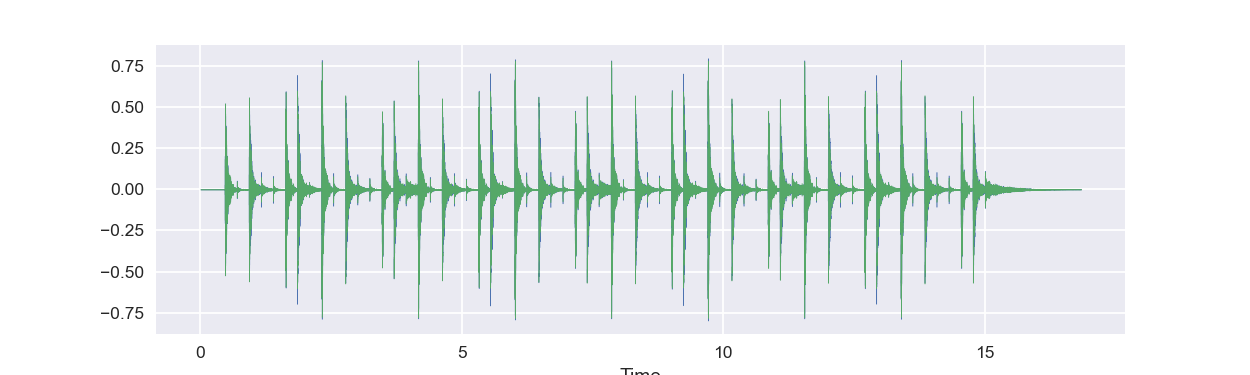

In [41]:
#chosing the sampling rate
sr = 22050

#filename including path
file = './data/examples1/drums.wav'

#the load function returns the signal and the sampling rate
#we have to read sr back, we can't skip it or you can use read it to a dummy variable
signal, sr = librosa.load(file, sr=sr, mono=False)

#display the shape of the signal array
print(signal.shape)

#display file duration in seconds in a more readable format wit less decimals (or multiply it by 1000 and get ms)
print('{:2.3f}'.format(librosa.samples_to_time(signal.shape[0], sr=sr)))

#setting the size of the figure (not a must)
plt.figure(figsize=(10, 3))
#display the waveform (mind that we are not using matplotlib here!)
librosa.display.waveshow(y=signal[0], sr=sr)
librosa.display.waveshow(y=signal[1], sr=sr)

#this wont play the audio but it will create a widget from which you can play
#make sure the sampling rate is correct (what happens if you change it?)
#place this at the end of the code cell, otherwise subsequent plots may override it
Ipd.Audio(signal, rate=sr)

### 3. Follow-up Activities

1. test the above code with different files in the "examples folder"
2. note the different lenght, sampling rate, and number of channels of the different files
3. read files using different sampling rate
4. when loading a stereo file, try to show the waveform for left and right channel
5. try to read only the first few few seconds or hundred of milliseconds of the files
6. try to read only few seconds or hundred of milliseconds from a random position (i.e. not from the beginning)


### 4. Computing scalar features
The code below computes and displays [rms energy](https://librosa.org/doc/latest/generated/librosa.feature.rms.html#librosa.feature.rms) and
[spectral centroid](https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html#librosa.feature.spectral_centroid) and  using librosa.

When printing the variables *rms* and *cent* notice that these are arrays.

Indeed the rms and centroid are computed (by default) over windows of 2048 samples with an overlap of 512 samples. 

This is called block processing (based on the short-time fourier transform) and is illustrated in the image below. Signals are usually analyzed over sequence of small overlapping windows (especially if you are converting the data to frequency domain). This process is illustrated in the image below.

![block processing](https://uk.mathworks.com/help/dsp/ref/stft_output.png)

(1, 431)


<IPython.core.display.Javascript object>


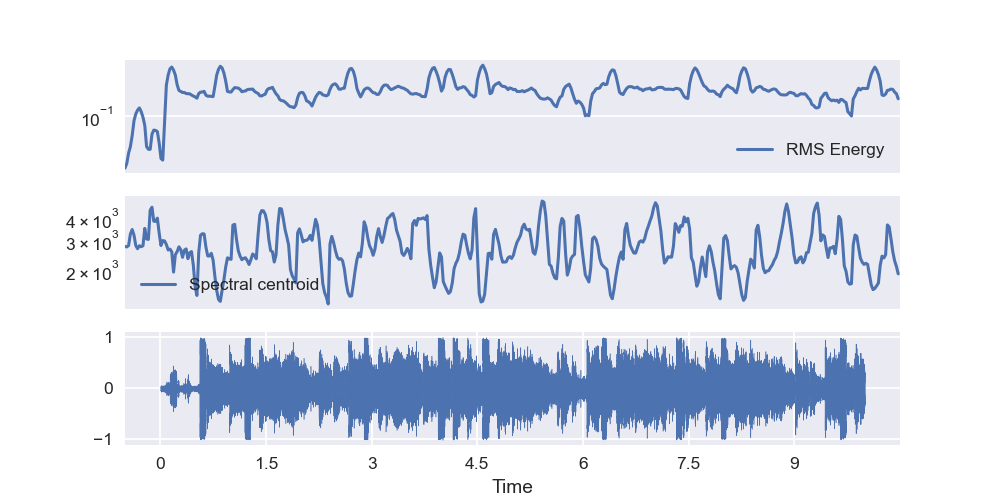

In [3]:
#chosing the sampling rate
sr = 22050

#filename including path
file = r"C:\Users\ninoj\OneDrive\Desktop\Segmented Audio\t1.wav"

#the load function returns the signal and the sampling rate
#we have to read sr back, we can't skip it or you can use read it to a dummy variable
signal, sr = librosa.load(file, sr=sr, mono=True)


#computing spectral centroid and bandwidth
rms = librosa.feature.rms(y=signal)
cent = librosa.feature.spectral_centroid(y=signal)

print(rms.shape)

#the code below is only for plotting the features computed above
#plotting rms, centroid, and waveform in a 3x1 plot
plt.figure(figsize=(8, 4))
#first subplot
plt.subplot(3, 1, 1)
#using log vertical (y) axis (remember human perception of frequency....)
#and adding a label (displayed later as legend)
plt.semilogy(rms.T, label='RMS Energy')
#getting rid of ticks on horizontal axis (it wont be related to either time or samples but blocks)
plt.xticks([])
#this will help to stretch the plot to the frame
plt.xlim([0, rms.shape[-1]])
#display the legend
plt.legend()
plt.subplot(3, 1, 2)
plt.semilogy(cent.T, label='Spectral centroid')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()


#displaying the waveform as well, so we can try to identify eventual correlations 
plt.subplot(3, 1, 3)
librosa.display.waveshow(y=signal, sr=sr)
plt.show()

#this wont play the audio but it will create a widget from which you can play
#make sure the sampling rate is correct (what happens if you change it?)
Ipd.Audio(signal, rate=sr)



Additional reading about the [window size](https://support.ircam.fr/docs/AudioSculpt/3.0/co/Window%20Size.html)


### 5. Follow-up Activities

1. Try to compute different scalar features available in librosa
2. By default features in librosa are computed over a window of 2048 samples with an overlap of 512 samples. Convert these values to time, and try to change them.


### 6. Computing vector features
The code below computes the [melspectrogram](https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram) using librosa.

The mel-spectrogram is a [spectrogram](https://cnx.org/contents/d442r0wh@9.71:4XRHF7jF@22/Spectrograms) (also called sonogram) where the frequency axis is not linear (i.e. frequency points equally distributed between 0Hz and half of the sampling rate), but arranged according to the [mel scale](https://en.wikipedia.org/wiki/Mel_scale), which is more perceptually relevant.

As in the earlier example, the analysis is performed for each block (or window), but instead of computing a single number per window, we compute multiple numbers (i.e. a vector) for each window (i.e. we compute the spectrum of each window).

![spectrogram computation](https://cnx.org/resources/febd04586ef83a3d2cd2faf35c5cb27444cf70c4/sig20.png)

(128, 1293)


<IPython.core.display.Javascript object>


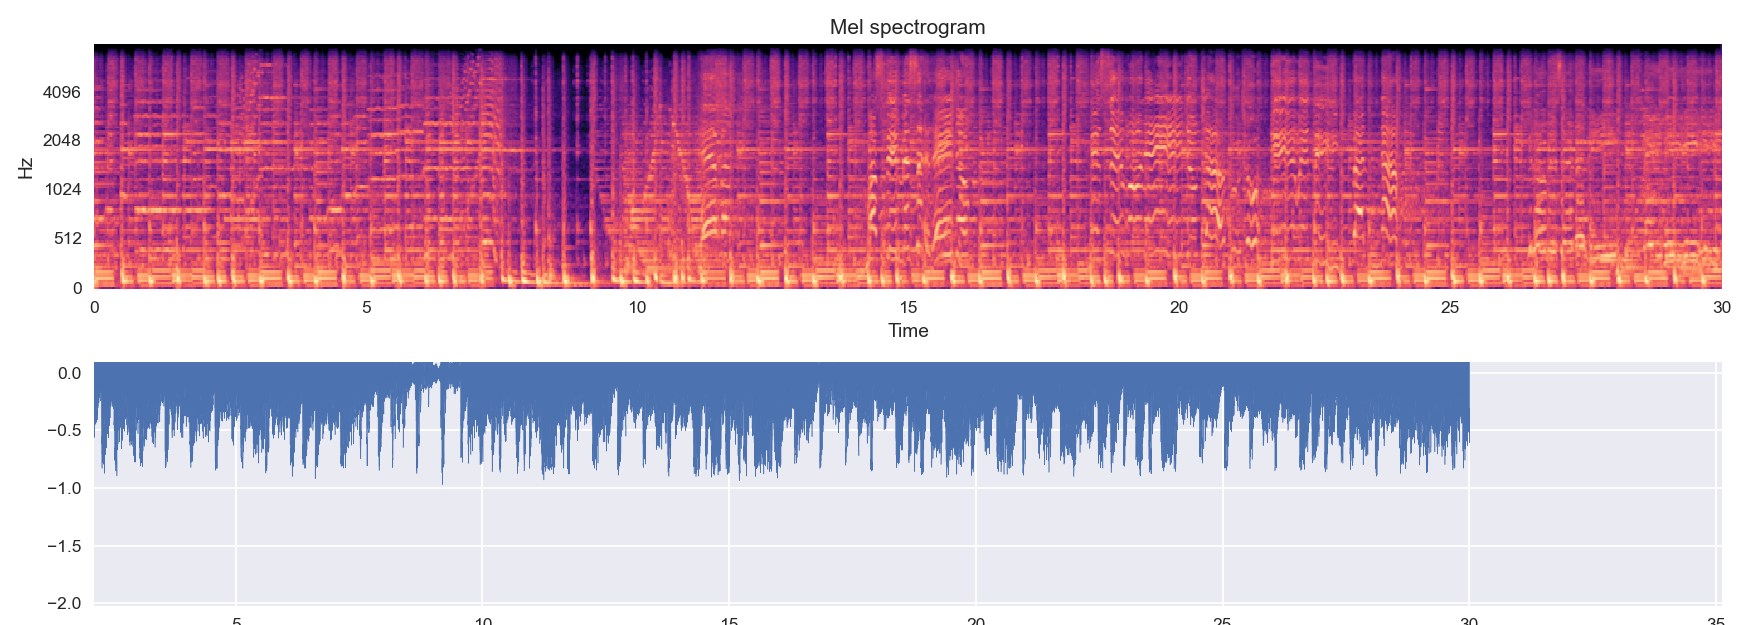

(128, 1293)
(165504,)


In [45]:
#loading file
sr = 22050
file1 = './data/examples1/disco.wav'
signal, sr = librosa.load(file1, sr=sr, mono=True)

#computing melspectrogram
melspect = librosa.feature.melspectrogram(y=signal)

print(melspect.shape)

#plotting me-spectrogram and waveform 2x1 plot 
plt.figure(figsize=(14, 5))
#first subplot
plt.subplot(2, 1, 1)
#plotting mel-spectrogram and display
librosa.display.specshow(librosa.power_to_db(melspect,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
#adding a colorbar as legend
plt.title('Mel spectrogram')
plt.tight_layout()

#second subplot
plt.subplot(2, 1, 2)
#displaying the waveform as well, so we can try to identify eventual correlations 
librosa.display.waveshow(signal, sr=sr)
#plt.show()

# to use the mel spectrogram as a feature array we need to flatten it (you should not stretch it after been flattened)
print(np.shape(melspect))
print(np.shape(melspect.flatten()))


### 7. Follow-up Activities

1. Compare the size of the raw data versus the features (check the shape and size of the resulting arrays).
2. Try to change the computational parameters (such as window size and overlap) of the melspectrogram to get a more compact representation and think about what are you loosing by doing that.
3. try to reduce the number of features per window to 13 (vectorial example only). To do that, create and use a new [mel filter](https://librosa.org/doc/latest/generated/librosa.filters.mel.html?highlight=mel)
4. Some of the techniques we experimented for scalar features are not suitable or meaningful for vectorial features, try to reflect and identify how we can eventually deal with vectorial features computed from files with dirrerent lenght.
5. Experiment with other vectorial feature available in librosa.

### 8. For your project

Besides extracting features [Librosa](https://librosa.org/doc/latest/index.html) includes a lot of funtionalities to process music and audio. This can be used to pre-process your dataset by segmenting long audio files, or detecting onset and removing the unwanted audio signal before that. Explore the functionality provided by the library and see how this can be suitable for your project.
